In [215]:
%run db_connection.ipynb

mongo = db_connection()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np




def get_actor_orders_df(actor_id):
    data=mongo.get_actor_orders(actor_id)
    return pd.DataFrame(data["orders_"+str(actor_id)][0]) 

In [216]:
frames=[]
for el in range(1,6):
    frames.append(get_actor_orders_df(el))
all_actors=pd.concat(frames)

In [217]:
def get_inventory_snapshot():

    data_array=mongo.get_inventory_snapshot()["inventory_snapshot"]

    inventory_stapshot=[]
    for data_row in data_array:


        for actor_id, actor_inv in data_row["inventory"].items():
            actor_dic={}

            for actor_row in actor_inv:
                actor_dic["day"]=int(data_row["_id"])
                actor_dic["actor"]=int(actor_id)
                actor_dic["product"]=int(actor_inv[actor_row]["id"])
                actor_dic["in_stock"]=int(actor_inv[actor_row]["in_stock"])
                try:
                    actor_dic["safety_stock"]=int(actor_inv[actor_row]["safety_stock"])
                except:
                    continue
            inventory_stapshot.append(actor_dic)

    return pd.DataFrame(inventory_stapshot)



In [218]:
# show_inventory_evolution
df=get_inventory_snapshot()
df

,day,actor,product,in_stock,safety_stock
0,1,1,1001,13648,0.0
1,1,2,2001,13648,0.0
2,1,3,3001,13648,0.0
3,1,4,4001,13648,0.0
4,1,5,5001,9999999999,1.0
...,...,...,...,...,...
34435,5740,2,3001,0,NaN
34436,5740,3,4001,10388,NaN
34437,5740,4,5001,944808,NaN
34438,5740,5,5001,10448592,1.0


In [219]:
df0=df.loc[df['actor'] == 0]
df1=df.loc[df['actor'] == 1]
df2=df.loc[df['actor'] == 2]
df3=df.loc[df['actor'] == 3]
df4=df.loc[df['actor'] == 4]
df5=df.loc[df['actor'] == 5]


In [220]:
# plt.plot( "day", "in_stock", "", data=pltdf, linestyle='-', marker='o', markersize=0.7)


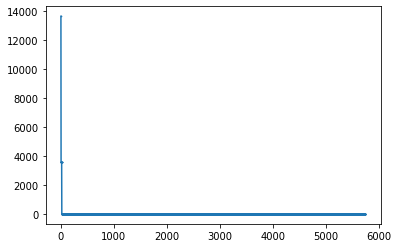

In [221]:
plt.plot( "day", "in_stock", "", data=df1,  marker='o', markersize=0.7)

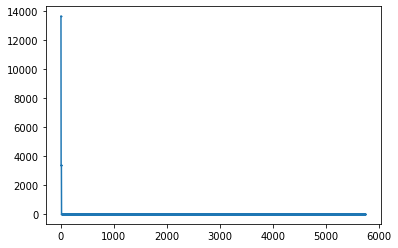

In [222]:
plt.plot( "day", "in_stock", "", data=df2,  marker='o', markersize=0.7)

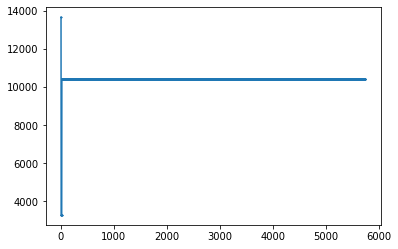

In [223]:
plt.plot( "day", "in_stock", "", data=df3,  marker='o', markersize=0.7)

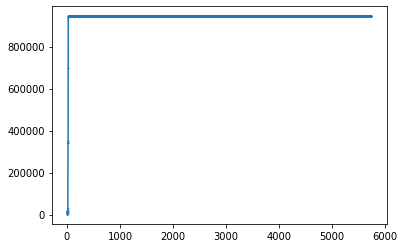

In [224]:
plt.plot( "day", "in_stock", "", data=df4,  marker='o', markersize=0.7)

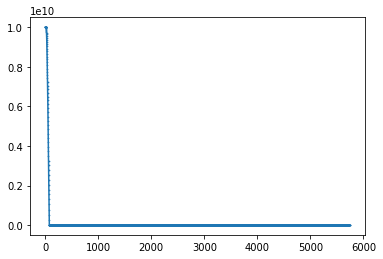

In [225]:
plt.plot( "day", "in_stock", "", data=df5,  marker='o', markersize=0.7)

In [226]:
dfx=df0.describe()

In [227]:
print("in stock","\n\n",
    df0["in_stock"].describe().apply("{0:.0f}".format),"\n\n",
    df1["in_stock"].describe().apply("{0:.0f}".format),"\n\n",
    df2["in_stock"].describe().apply("{0:.0f}".format),"\n\n",
    df3["in_stock"].describe().apply("{0:.0f}".format),"\n\n",
    df4["in_stock"].describe().apply("{0:.0f}".format),"\n\n",
    df5["in_stock"].describe().apply("{0:.0f}".format),"\n\n")


in stock 

 count     5740
mean     30083
std       1655
min          0
25%      30195
50%      30195
75%      30195
max      30195
Name: in_stock, dtype: object 

 count     5740
mean        11
std        251
min          0
25%          0
50%          0
75%          0
max      13648
Name: in_stock, dtype: object 

 count     5740
mean         9
std        284
min          0
25%          0
50%          0
75%          0
max      13648
Name: in_stock, dtype: object 

 count     5740
mean     10374
std        346
min       3280
25%      10388
50%      10388
75%      10388
max      13648
Name: in_stock, dtype: object 

 count      5740
mean     941595
std       52496
min        3260
25%      944808
50%      944808
75%      944808
max      944808
Name: in_stock, dtype: object 

 count          5740
mean      101139599
std       867436401
min        10448592
25%        10448592
50%        10448592
75%        10448592
max      9999999999
Name: in_stock, dtype: object 


